In [14]:
'''
Training a fully supervised one layer NMF on 20 news group dataset
'''
# define some global variables
save_PATH = 'saved_data/'
save_filename = 'supervised_one_layer'

In [15]:
# import package
%load_ext memory_profiler
import torch
from torch.autograd import Variable
import Ipynb_importer
from deep_nmf import Deep_NMF, Energy_Loss_Func, Fro_Norm
from writer import Writer
from matplotlib import pyplot as plt
import numpy as np
from auxillary_functions import *

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [16]:
# load the dataset for twenty news
from twenty_news_group_data_loading import data, Y, target,L20, L50, L90, sparsedata_cr_entr, sparsedata_L2#, get_whole_output

In [76]:
# Define the network 
m = data.shape[1]
k = 20
c = 20
lambd = 1e-4
net = Deep_NMF([m, k], c)
loss_func = Energy_Loss_Func(lambd = lambd, classification_type = 'L2')
data_input = data*1000
dataset = sparsedata_L2(data_input, 1000*Y)
criterion = Fro_Norm()


In [77]:
# try initializing the network with the unsupervised version
#A = np.load(save_PATH + '20_news_group_A.npy')
#net.lsqnonneglst[0].A.data = torch.from_numpy(A)

In [78]:
net.linear.weight.data = torch.randn(net.linear.weight.data.shape).double()

In [86]:
# Training process!

# setting training parameters
batchsize = 40
epoch = 4
lr_nmf = 1000000
lr_cl = 1
loss_lst = []
history = Writer()
# train!
for epo in range(epoch):
    dataloader = torch.utils.data.DataLoader(dataset, batch_size = batchsize, shuffle = True)
    total_loss = 0
    for (i, (inputs, label)) in enumerate(dataloader):
        inputs = inputs.view([inputs.shape[0], inputs.shape[2]])
        label = label.view([label.shape[0], -1])
        inputs, label = Variable(inputs), Variable(label)
        
        #train the lsqnonneg layers
#         print('training the nmf layer')
#         #for k in range(10):
#         net.zero_grad()
#         S_lst,pred = net(inputs)
#         loss = loss_func(inputs, S_lst,list(net.lsqnonneglst.parameters()),pred,label)
#         loss.backward()
#         loss_lst.append(loss.data)
#         total_loss += loss.data
#         print(loss.data)
#         for A in net.lsqnonneglst.parameters():
#             A.data = A.data.sub_(lr_nmf*A.grad.data)
#             A.data = A.data.clamp(min = 0)
        for A in net.lsqnonneglst.parameters():
            A.requires_grad = False
        
        #train the linear classifier
        S_lst, pred = net(inputs)
        print('training the classifier')
        for k in range(1):
            net.zero_grad()
            pred = net.linear(S_lst[-1].data)
            loss = criterion(pred, label)
            loss.backward()
            #print(loss.data)
            #loss_lst.append(loss.data)
            for A in net.linear.parameters():
                A.data = A.data.sub_(lr_cl*A.grad.data)
        loss1 = loss_func(inputs, S_lst, list(net.lsqnonneglst.parameters()), pred, label)
        print(loss1.data)
#         for A in net.lsqnonneglst.parameters():
#             A.requires_grad = True
#         %memit
        #while True:
            #pass
    # should be deleted later on
    print('epoch = ', epo, '\n', total_loss)

training the classifier
tensor(8.9547, dtype=torch.float64)
training the classifier
tensor(9.4363, dtype=torch.float64)
training the classifier
tensor(9.2187, dtype=torch.float64)
training the classifier
tensor(9.0418, dtype=torch.float64)
training the classifier
tensor(9.0210, dtype=torch.float64)
training the classifier
tensor(9.0781, dtype=torch.float64)
training the classifier
tensor(9.2136, dtype=torch.float64)
training the classifier
tensor(8.8685, dtype=torch.float64)
training the classifier
tensor(9.1673, dtype=torch.float64)
training the classifier
tensor(9.2372, dtype=torch.float64)
training the classifier
tensor(8.9671, dtype=torch.float64)
training the classifier
tensor(9.0832, dtype=torch.float64)
training the classifier
tensor(9.3886, dtype=torch.float64)
training the classifier
tensor(9.2111, dtype=torch.float64)
training the classifier
tensor(9.5321, dtype=torch.float64)
training the classifier
tensor(8.7915, dtype=torch.float64)
training the classifier
tensor(9.1512, d

KeyboardInterrupt: 

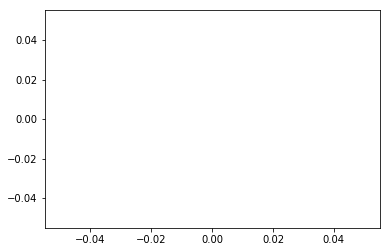

In [87]:
plt.plot(loss_lst)
plt.show()

In [12]:
# Training process!
import time
# setting training parameters
batchsize = 100
epoch = 40
lr = 5000
lr_nmf = 5000
lr_cl = 5000
loss_lst = []
# train!
for epo in range(epoch):
    dataloader = torch.utils.data.DataLoader(dataset, batch_size = batchsize, shuffle = True)
    total_loss = 0
    for (i, (inputs, label)) in enumerate(dataloader):
        t1 = time.time()
        inputs = inputs.view([inputs.shape[0], inputs.shape[2]])
        label = label.view([label.shape[0], -1])
        inputs, label = Variable(inputs), Variable(label)
       #train the lsqnonneg layers
        net.zero_grad()
        S_lst,pred = net(inputs)
        loss = loss_func(inputs, S_lst,list(net.lsqnonneglst.parameters()),pred,label)
        loss.backward()
        loss_lst.append(loss.data)
        total_loss += loss.data
        print('current at batch:', i+1, loss.data)
        t2 = time.time()
        print(t2 - t1)
        for A in net.parameters():
            A.data = A.data.sub_(lr*A.grad.data)
        for A in net.lsqnonneglst.parameters():
            A.data = A.data.clamp(min = 0)
    print('epoch = ', epo, '\n', total_loss)

current at batch: 1 tensor(12.6814, dtype=torch.float64)
27.797811269760132
current at batch: 2 tensor(12.6812, dtype=torch.float64)
25.6742844581604
current at batch: 3 tensor(12.6807, dtype=torch.float64)
25.306217670440674
current at batch: 4 tensor(12.6806, dtype=torch.float64)
29.324053287506104
current at batch: 5 tensor(12.6798, dtype=torch.float64)
28.071542739868164
current at batch: 6 tensor(12.6794, dtype=torch.float64)
24.927058458328247
current at batch: 7 tensor(12.6781, dtype=torch.float64)
20.392109870910645
current at batch: 8 tensor(12.6763, dtype=torch.float64)
15.623805522918701
current at batch: 9 tensor(12.6733, dtype=torch.float64)
13.157130002975464
current at batch: 10 tensor(12.6676, dtype=torch.float64)
11.220972299575806
current at batch: 11 tensor(12.6607, dtype=torch.float64)
8.328207731246948
current at batch: 12 tensor(12.6470, dtype=torch.float64)
6.750073432922363
current at batch: 13 tensor(12.6270, dtype=torch.float64)
6.984508752822876
current at ba

KeyboardInterrupt: 

In [19]:
# save the data
np.savez(save_PATH + save_filename,
         param_lst = list(net.parameters()), loss_lst = loss_lst)

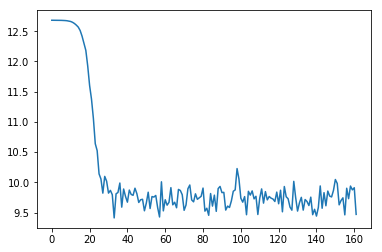

batch_num =  189 

current at batch: 0


MemoryError: 

In [13]:
# plot the loss curve
plt.plot(loss_lst)
plt.show()
# # Get the whole output of the whole dataset (running forward propagation on the whole dataset)
S, pred = get_whole_output(net, dataset)
# Get the accuracy
accuracy = torch.sum(torch.argmax(pred, 1) 
                      == torch.argmax(torch.from_numpy(Y),1)).float()/len(dataset)
# print(accuracy)
# # Get the reconstruction error
# A_np = net.lsqnonneglst[0].A.data.numpy()
# S_np = S.data.numpy()
# fro_error, fro_X = calc_reconstruction_error(data_input, A_np, S_np)
# print(fro_error/fro_X)

In [ ]:
# save the data
np.savez(save_PATH + save_filename, S = S, pred = pred,
         param_lst = list(net.parameters()), loss_lst = loss_lst)